<a href="https://colab.research.google.com/github/aishwarya-shekar-babu/Road-Accident-Prediction/blob/main/Road_Accident_Prediction_eda_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Prediction of Road Accident Severity with Urban factors and Weather conditions

## Research question


1.   **Research Question 1:** which machine learning approach is optimal in accurately predict the severity of UK road accidents using environmental (e.g. weather), temporal (e.g. time of day, season), spatial (e.g. urban/rural), and which features contribute most to severe outcomes?
2.  **Research Question 2:** How do different weather conditions influence the severity of road traffic accidents, and to predict risk levels associated with specific weather categories? and which location are associated with the highest severity of accidents



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# LOADING DATASET FROM GITHUB

In [ ]:
#!wget https://github.com/aishwarya-shekar-babu/Road-Accident-Prediction/raw/main/archive.zip -O /content/drive/MyDrive/RoadAccidentData/archive.zip


In [ ]:
#!wget https://github.com/aishwarya-shekar-babu/Road-Accident-Prediction/raw/main/archive-vehicle.zip -O /content/drive/MyDrive/RoadAccidentData/archive-vehicle.zip

In [ ]:
#!unzip /content/drive/MyDrive/RoadAccidentData/archive.zip -d /content/drive/MyDrive/RoadAccidentData/

Archive:  /content/drive/MyDrive/RoadAccidentData/archive.zip
   creating: /content/drive/MyDrive/RoadAccidentData/archive/
  inflating: /content/drive/MyDrive/RoadAccidentData/archive/Accident_Information.csv  


In [ ]:
#!unzip /content/drive/MyDrive/RoadAccidentData/archive-vehicle.zip -d /content/drive/MyDrive/RoadAccidentData/


Archive:  /content/drive/MyDrive/RoadAccidentData/archive-vehicle.zip
   creating: /content/drive/MyDrive/RoadAccidentData/archive-vehicle (1)/
  inflating: /content/drive/MyDrive/RoadAccidentData/archive-vehicle (1)/Vehicle_Information.csv  


# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
import pandas as pd

# READING DATASET

The dataset contains accident details .Following code is written to merge this dataset and analyse the columns to be considered for further research

In [3]:
# Path to your file
as_accident_df = pd.read_csv(
    '/content/drive/MyDrive/RoadAccidentData/archive/Accident_Information.csv',
    encoding='ISO-8859-1',
    dtype={'Accident_Index': str},
)

print(as_accident_df.columns)

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')


In [4]:
as_accident_df.shape

(2047256, 34)

In [5]:
as_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [6]:
as_accident_df.shape

(2047256, 34)

# Data cleaning and preprocessing

## To check missing counts per column

In [7]:
#  Missing counts per column and it displays in ascending order
missing_counts = as_accident_df.isna().sum().sort_values(ascending=False)
print("Missing counts per column:")
print(missing_counts)

# 2. Missing values in percentage
missing_pct = (missing_counts / len(as_accident_df) * 100).sort_values(ascending=False)
print("\nMissing percentages per column:")
print(missing_pct)


Missing counts per column:
Carriageway_Hazards                            2007807
Special_Conditions_at_Site                     1995137
2nd_Road_Class                                  844272
LSOA_of_Accident_Location                       144953
2nd_Road_Number                                  17593
Pedestrian_Crossing-Physical_Facilities           3560
Pedestrian_Crossing-Human_Control                 2920
Did_Police_Officer_Attend_Scene_of_Accident        278
Longitude                                          175
Latitude                                           174
Location_Easting_OSGR                              164
Location_Northing_OSGR                             164
Time                                               156
InScotland                                          53
Speed_limit                                         37
1st_Road_Number                                      2
1st_Road_Class                                       0
Accident_Index                        

## Dropping unwanted columns and which has more missing values



*   Any column that has more than 40% data missing dropping columns

*   Dropping columns which are not necsaary for further analysis






In [8]:
# listing the columns to be dropped
cols_to_drop = [
    'Accident_Index',
    '1st_Road_Class',
    '1st_Road_Number',
    '2nd_Road_Class',
    '2nd_Road_Number',
    'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident',
    'Junction_Control',
    'Junction_Detail',
    'Local_Authority_(Highway)',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Special_Conditions_at_Site',
]

# Drop them in one go:
as_accident_df = as_accident_df.drop(columns=cols_to_drop, errors='ignore')

print("Remaining columns:", as_accident_df.columns.tolist())
print("New shape:", as_accident_df.shape)


Remaining columns: ['Accident_Severity', 'Date', 'Day_of_Week', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Year', 'InScotland']
New shape: (2047256, 21)


## Subsetting further to filter the columns

The columns are filtered further be proceeding with the modelling

In [9]:
as_cols = [
    'Accident_Severity','Date','Time','Latitude','Longitude',
    'Local_Authority_(District)','LSOA_of_Accident_Location','Urban_or_Rural_Area',
    'Road_Surface_Conditions','Road_Type','Speed_limit','Weather_Conditions',
    'Light_Conditions','Number_of_Casualties','Number_of_Vehicles',
    'Police_Force','Day_of_Week','InScotland'
]
as_accident_level = as_accident_df[as_cols].copy()
print("After subsetting:", as_accident_level.shape)

After subsetting: (2047256, 18)


## To find the hidden null values
Null values always need not be **NaN**,usually in categorical columns and data missing could also be representd as Data out of Range or unalloacted string,to identify if there is such ourrances checking the unqiue values

In [10]:
# 1. Unique values in Urban_or_Rural_Area
print("Unique values in Urban_or_Rural_Area:")
print(as_accident_level['Urban_or_Rural_Area'].value_counts(dropna=False))

# 2. Unique values in Weather_Conditions
print("\nUnique values in Weather_Conditions:")
print(as_accident_level['Weather_Conditions'].value_counts(dropna=False))

Unique values in Urban_or_Rural_Area:
Urban_or_Rural_Area
Urban          1322339
Rural           724757
Unallocated        160
Name: count, dtype: int64

Unique values in Weather_Conditions:
Weather_Conditions
Fine no high winds              1640095
Raining no high winds            239281
Other                             44083
Unknown                           42521
Raining + high winds              28343
Fine + high winds                 25816
Snowing no high winds             13387
Fog or mist                       11068
Snowing + high winds               2487
Data missing or out of range        175
Name: count, dtype: int64


In [11]:
# 1. Identify all object‐ or category‐dtype columns
cat_cols = as_accident_level.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Loop through and print unique values for each
for col in cat_cols:
    unique_vals = as_accident_level[col].unique()
    print(f"Column: {col}")
    print(f"  ({len(unique_vals)} unique values) → {unique_vals}\n")


Column: Accident_Severity
  (3 unique values) → ['Serious' 'Slight' 'Fatal']

Column: Date
  (4748 unique values) → ['2005-01-04' '2005-01-05' '2005-01-06' ... '2017-12-28' '2017-12-29'
 '2017-12-30']

Column: Time
  (1440 unique values) → ['17:42' '17:36' '00:15' ... '05:57' '04:26' '01:57']

Column: Local_Authority_(District)
  (416 unique values) → ['Kensington and Chelsea' 'Westminster' 'Hammersmith and Fulham'
 'City of London' 'Tower Hamlets' 'Southwark' 'Hackney' 'Islington'
 'Camden' 'Lambeth' 'Brent' 'Haringey' 'Barnet' 'Ealing'
 'Richmond upon Thames' 'Waltham Forest' 'Newham'
 'London Airport (Heathrow)' 'Hillingdon' 'Harrow' 'Hounslow' 'Enfield'
 'Redbridge' 'Barking and Dagenham' 'Havering' 'Croydon' 'Wandsworth'
 'Sutton' 'Lewisham' 'Bromley' 'Greenwich' 'Bexley' 'Kingston upon Thames'
 'Merton' 'South Lakeland' 'Barrow-in-Furness' 'Carlisle' 'Eden'
 'Allerdale' 'Copeland' 'Blackpool' 'Fylde' 'Lancaster'
 'Blackburn with Darwen' 'Preston' 'Wyre' 'South Ribble' 'West Lanca

In [12]:
as_accident_level.shape

(2047256, 18)

## Handling missing values and duplicate data


*   Dropping most of missing values rows might lead to data loss
*   Other popular ways to handle missing values is imputing values or replacing with unkown parameter


*   While handling the missing values its necessary to also check if the datatype allocated is right its also part of data cleaning and preprocessing
*   There might be columns which is representing data with same details which would be redudant





In [13]:
# 2.3 Fill missing Time with "00:00"
as_accident_level['Time'] = as_accident_level['Time'].fillna('00:00')

# 1) First, coerce Latitude/Longitude to numeric (so any non-numeric becomes NaN)
as_accident_level['Latitude'] = pd.to_numeric(
    as_accident_level['Latitude'], errors='coerce'
)
as_accident_level['Longitude'] = pd.to_numeric(
    as_accident_level['Longitude'], errors='coerce'
)

# 2) Now drop any row where either is NaN
before = as_accident_level.shape[0]
as_accident_level = as_accident_level.dropna(
    subset=['Latitude','Longitude'], how='any'
)

In [14]:
# 2.5 Drop OS grid columns entirely
as_accident_level = as_accident_level.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR'], errors='ignore')

# 2.6 Fill missing Speed_limit with -1
as_accident_level['Speed_limit'] = as_accident_level['Speed_limit'].fillna(-1)

# 2.10 Fill missing Number_of_Casualties / Number_of_Vehicles with 0
as_accident_level['Number_of_Casualties'] = \
    as_accident_level['Number_of_Casualties'].fillna(0).astype(int)
as_accident_level['Number_of_Vehicles']   = \
    as_accident_level['Number_of_Vehicles'].fillna(0).astype(int)

In [15]:
# 2.7 Fill missing InScotland with "Unknown"
as_accident_level['InScotland'] = as_accident_level['InScotland'].fillna('Unknown').astype(str).str.strip()

# 2.8 Fill missing LSOA_of_Accident_Location (~7%) with "Unknown"
as_accident_level['LSOA_of_Accident_Location'] = (
    as_accident_level['LSOA_of_Accident_Location']
    .fillna('Unknown')
    .astype(str)
    .str.strip()
)

In [16]:
# 2.9 Fill all remaining categorical columns with "Unknown" if missing
for col in [
    'Local_Authority_(District)',
    'Urban_or_Rural_Area',
    'Road_Surface_Conditions',
    'Road_Type',
    'Weather_Conditions',
    'Light_Conditions',
    'Day_of_Week',
    'Police_Force'
]:
    as_accident_level[col] = as_accident_level[col].fillna('Unknown').astype(str).str.strip()


# 2.11 PARSE DATE into datetime, letting pandas infer format (no explicit format string):
print("Before date parsing, rows:", as_accident_level.shape[0])
as_accident_level['Date_dt'] = pd.to_datetime(as_accident_level['Date'], errors='coerce')
# Drop any rows where date parse failed—should be very few if any
before_drop_date = as_accident_level.shape[0]
as_accident_level = as_accident_level.dropna(subset=['Date_dt'])
print("Dropped", before_drop_date - as_accident_level.shape[0], "rows where Date parse failed")
print("After date parsing, rows:", as_accident_level.shape[0])





Before date parsing, rows: 2047081
Dropped 0 rows where Date parse failed
After date parsing, rows: 2047081


# FEATURE ENGINNERING


## Obtaining temporal features

In [17]:

# 3.1 TEMPORAL FEATURES
as_accident_level['Hour'] = pd.to_datetime(
    as_accident_level['Date'] + ' ' + as_accident_level['Time'],
    format='%Y-%m-%d %H:%M',  # Time string already "HH:MM", Date "YYYY-MM-DD"
    errors='coerce'
).dt.hour

# If any Hour parse failed (unlikely), fill with median
as_accident_level['Hour'] = as_accident_level['Hour'].fillna(as_accident_level['Hour'].median()).astype(int)

# Weekday and Month from Date_dt
as_accident_level['Weekday_Num'] = as_accident_level['Date_dt'].dt.dayofweek
as_accident_level['Month']       = as_accident_level['Date_dt'].dt.month

# 5.8 DAY OF WEEK: Day_of_Week_Label from Date_dt (ignore original Day_of_Week)
as_accident_level['Day_of_Week_Label'] = as_accident_level['Date_dt'].dt.day_name()

# Assuming 'Date_dt' is your datetime column
as_accident_level['Year'] = as_accident_level['Date_dt'].dt.year

# Season from Month
def month_to_season(m):
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
as_accident_level['Season'] = as_accident_level['Month'].apply(month_to_season)

# Time_of_Day from Hour
def time_of_day(h):
    if pd.isna(h):
        return 'Unknown'
    if h < 6:
        return 'Late_Night'
    elif h < 9:
        return 'Morning_Peak'
    elif h < 16:
        return 'Daytime'
    elif h < 19:
        return 'Evening_Peak'
    else:
        return 'Night'
as_accident_level['Time_of_Day'] = as_accident_level['Hour'].apply(time_of_day)



In [18]:
as_accident_level.head()

,Accident_Severity,Date,Time,Latitude,Longitude,Local_Authority_(District),LSOA_of_Accident_Location,Urban_or_Rural_Area,Road_Surface_Conditions,Road_Type,...,Day_of_Week,InScotland,Date_dt,Hour,Weekday_Num,Month,Day_of_Week_Label,Year,Season,Time_of_Day
0,Serious,2005-01-04,17:42,51.489096,-0.191170,Kensington and Chelsea,E01002849,Urban,Wet or damp,Single carriageway,...,Tuesday,No,2005-01-04,17,1,1,Tuesday,2005,Winter,Evening_Peak
1,Slight,2005-01-05,17:36,51.520075,-0.211708,Kensington and Chelsea,E01002909,Urban,Dry,Dual carriageway,...,Wednesday,No,2005-01-05,17,2,1,Wednesday,2005,Winter,Evening_Peak
2,Slight,2005-01-06,00:15,51.525301,-0.206458,Kensington and Chelsea,E01002857,Urban,Dry,Single carriageway,...,Thursday,No,2005-01-06,0,3,1,Thursday,2005,Winter,Late_Night
3,Slight,2005-01-07,10:35,51.482442,-0.173862,Kensington and Chelsea,E01002840,Urban,Dry,Single carriageway,...,Friday,No,2005-01-07,10,4,1,Friday,2005,Winter,Daytime
4,Slight,2005-01-10,21:13,51.495752,-0.156618,Kensington and Chelsea,E01002863,Urban,Wet or damp,Single carriageway,...,Monday,No,2005-01-10,21,0,1,Monday,2005,Winter,Night


## Handling urban_or_rural area

In [19]:
# 5.2 SPATIAL: URBAN_OR_RURAL_AREA → Urban_Rural_Label
#     Unique raw values: ['Urban', 'Rural', 'Unallocated']
as_accident_level['Urban_or_Rural_Area'] = as_accident_level['Urban_or_Rural_Area'].astype(str).str.strip()
def map_urban_rural(x):
    if x == 'Urban':
        return 'Urban'
    elif x == 'Rural':
        return 'Rural'
    else:  # 'Unallocated' or anything else
        return 'Unknown'
as_accident_level['Urban_Rural_Label'] = as_accident_level['Urban_or_Rural_Area'].apply(map_urban_rural)

In [20]:
as_accident_level.head()

,Accident_Severity,Date,Time,Latitude,Longitude,Local_Authority_(District),LSOA_of_Accident_Location,Urban_or_Rural_Area,Road_Surface_Conditions,Road_Type,...,InScotland,Date_dt,Hour,Weekday_Num,Month,Day_of_Week_Label,Year,Season,Time_of_Day,Urban_Rural_Label
0,Serious,2005-01-04,17:42,51.489096,-0.191170,Kensington and Chelsea,E01002849,Urban,Wet or damp,Single carriageway,...,No,2005-01-04,17,1,1,Tuesday,2005,Winter,Evening_Peak,Urban
1,Slight,2005-01-05,17:36,51.520075,-0.211708,Kensington and Chelsea,E01002909,Urban,Dry,Dual carriageway,...,No,2005-01-05,17,2,1,Wednesday,2005,Winter,Evening_Peak,Urban
2,Slight,2005-01-06,00:15,51.525301,-0.206458,Kensington and Chelsea,E01002857,Urban,Dry,Single carriageway,...,No,2005-01-06,0,3,1,Thursday,2005,Winter,Late_Night,Urban
3,Slight,2005-01-07,10:35,51.482442,-0.173862,Kensington and Chelsea,E01002840,Urban,Dry,Single carriageway,...,No,2005-01-07,10,4,1,Friday,2005,Winter,Daytime,Urban
4,Slight,2005-01-10,21:13,51.495752,-0.156618,Kensington and Chelsea,E01002863,Urban,Wet or damp,Single carriageway,...,No,2005-01-10,21,0,1,Monday,2005,Winter,Night,Urban


## Mapping weather types for each string into final label

In [21]:
# 1) Define an exact mapping from each raw string → final label
weather_map = {
    'Fine no high winds':       'Fine',
    'Fine + high winds':        'Fine+high winds',
    'Raining no high winds':    'Raining',
    'Raining + high winds':     'Raining',
    'Snowing no high winds':    'Snowing_Ice',
    'Snowing + high winds':     'Snowing_Ice',
    'Fog or mist':              'Fog',
    'Other':                    'Other_Adverse',
    'Unknown':                  'Unknown',
    'Data missing or out of range': 'Unknown'
}

# 2) Ensure there are no trailing spaces—strip just in case
as_accident_level['Weather_Conditions'] = as_accident_level['Weather_Conditions'].astype(str).str.strip()

# 3) Apply the mapping with .map(...). Any unexpected string becomes NaN,
#    so we then fillna('Unknown') to catch any anomalies.
as_accident_level['Weather_Label'] = (
    as_accident_level['Weather_Conditions']
    .map(weather_map)         # map known strings → label
    .fillna('Unknown')        # if somehow a value is not in the dict
)

# 4) Verify that the mapping worked correctly
print("Unique raw Weather_Conditions values:")
print(as_accident_level['Weather_Conditions'].unique(), "\n")

print("Unique mapped Weather_Label values:")
print(as_accident_level['Weather_Label'].unique())

# Optionally, show counts to ensure balance
print("\nValue counts for Weather_Label:")
print(as_accident_level['Weather_Label'].value_counts())


Unique raw Weather_Conditions values:
['Raining no high winds' 'Fine no high winds' 'Unknown'
 'Snowing no high winds' 'Other' 'Fine + high winds'
 'Raining + high winds' 'Fog or mist' 'Snowing + high winds'
 'Data missing or out of range'] 

Unique mapped Weather_Label values:
['Raining' 'Fine' 'Unknown' 'Snowing_Ice' 'Other_Adverse'
 'Fine+high winds' 'Fog']

Value counts for Weather_Label:
Weather_Label
Fine               1639967
Raining             267596
Other_Adverse        44079
Unknown              42687
Fine+high winds      25815
Snowing_Ice          15871
Fog                  11066
Name: count, dtype: int64


## Mapping surface types for each string into final label

In [22]:
def map_road_surface(x):
    if x == 'Dry':
        return 'Dry'
    elif x == 'Wet or damp':
        return 'Wet_or_Damp'
    elif x in ['Snow', 'Frost or ice']:
        return 'Snow_Ice'
    elif x == 'Flood over 3cm. deep':
        return 'Flood'
    else:  # 'Data missing or out of range' or anything else
        return 'Unknown'

as_accident_level['Road_Surface_Label'] = as_accident_level['Road_Surface_Conditions'].apply(map_road_surface)

print("Unique Road_Surface_Label values:", as_accident_level['Road_Surface_Label'].unique())



Unique Road_Surface_Label values: ['Wet_or_Damp' 'Dry' 'Snow_Ice' 'Flood' 'Unknown']


In [23]:
def map_road_type(x):
    if x == 'Dual carriageway':
        return 'Dual_Carriageway'
    elif x == 'Single carriageway':
        return 'Single_Carriageway'
    elif x == 'One way street':
        return 'One_Way_Street'
    elif x == 'Roundabout':
        return 'Roundabout'
    elif x == 'Slip road':
        return 'Slip_Road'
    else:  # 'Unknown' or 'Data missing or out of range'
        return 'Unknown'

as_accident_level['Road_Type_Label'] = as_accident_level['Road_Type'].apply(map_road_type)

print("Unique Road_Type_Label values:", as_accident_level['Road_Type_Label'].unique())


Unique Road_Type_Label values: ['Single_Carriageway' 'Dual_Carriageway' 'One_Way_Street' 'Roundabout'
 'Slip_Road' 'Unknown']


In [24]:
as_accident_level['Light_Conditions'] = as_accident_level['Light_Conditions'].astype(str).str.strip()

def map_light(x):
    if x == 'Daylight':
        return 'Daylight'
    elif x == 'Darkness - lights lit':
        return 'Darkness_Lights_On'
    elif x == 'Darkness - lights unlit':
        return 'Darkness_Lights_Off'
    elif x in ['Darkness - lighting unknown', 'Darkness - no lighting']:
        return 'Dark_No_Lighting'
    else:  # 'Data missing or out of range' or anything else
        return 'Unknown'

as_accident_level['Light_Label'] = as_accident_level['Light_Conditions'].apply(map_light)

print("Unique Light_Label values:", as_accident_level['Light_Label'].unique())

Unique Light_Label values: ['Daylight' 'Darkness_Lights_On' 'Dark_No_Lighting' 'Darkness_Lights_Off'
 'Unknown']


In [25]:
def speed_bin(x):
    try:
        sl = float(x)
    except:
        return 'Unknown'
    if sl <= 30:
        return 'Low_30'
    elif sl <= 50:
        return 'Mid_50'
    elif sl <= 70:
        return 'High_70'
    else:
        return 'Very_High'

as_accident_level['Speed_Bin'] = as_accident_level['Speed_limit'].apply(speed_bin)

print("Unique Speed_Bin values:", as_accident_level['Speed_Bin'].unique())

Unique Speed_Bin values: ['Low_30' 'Mid_50' 'High_70']


In [26]:
# Now that we have mapped/engineered every column, drop the raw ones:
cols_to_drop = [
    'Date',
    'Time',
    'Urban_or_Rural_Area',
    'Road_Surface_Conditions',
    'Road_Type',
    'Speed_limit',
    'Weather_Conditions',
    'Light_Conditions',
    'Day_of_Week'
]

as_accident_level = as_accident_level.drop(columns=[c for c in cols_to_drop if c in as_accident_level.columns],
                                     errors='ignore')

print("\nFinal columns in accident_level:")
print(as_accident_level.columns.tolist())

print("\nFinal shape:", as_accident_level.shape)


Final columns in accident_level:
['Accident_Severity', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'InScotland', 'Date_dt', 'Hour', 'Weekday_Num', 'Month', 'Day_of_Week_Label', 'Year', 'Season', 'Time_of_Day', 'Urban_Rural_Label', 'Weather_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Light_Label', 'Speed_Bin']

Final shape: (2047081, 23)


## Final check of missing values

In [27]:
# Check for any remaining missing values in the columns we care about:
to_check = [
    'Local_Authority_(District)',
    'LSOA_of_Accident_Location',
    'Police_Force',
    'InScotland',
    'Hour',
    'Weekday_Num',
    'Month',
    'Season',
    'Time_of_Day',
    'Urban_Rural_Label',
    'Weather_Label',
    'Light_Label',
    'Road_Surface_Label',
    'Road_Type_Label',
    'Speed_Bin',
    'Day_of_Week_Label',
    'Number_of_Vehicles',
    'Number_of_Casualties',
    'Latitude',
    'Longitude'
]

print("\nMissing counts in final features:")
print(as_accident_level[to_check].isna().sum())

# Show the first few rows of the cleaned DataFrame
print("\nSample of final accident_level:")
print(as_accident_level.head())


Missing counts in final features:
Local_Authority_(District)    0
LSOA_of_Accident_Location     0
Police_Force                  0
InScotland                    0
Hour                          0
Weekday_Num                   0
Month                         0
Season                        0
Time_of_Day                   0
Urban_Rural_Label             0
Weather_Label                 0
Light_Label                   0
Road_Surface_Label            0
Road_Type_Label               0
Speed_Bin                     0
Day_of_Week_Label             0
Number_of_Vehicles            0
Number_of_Casualties          0
Latitude                      0
Longitude                     0
dtype: int64

Sample of final accident_level:
  Accident_Severity   Latitude  Longitude Local_Authority_(District)  \
0           Serious  51.489096  -0.191170     Kensington and Chelsea   
1            Slight  51.520075  -0.211708     Kensington and Chelsea   
2            Slight  51.525301  -0.206458     Kensington and Ch

In [28]:
# Assuming your cleaned DataFrame is `as_accident_level`
print(as_accident_level.columns.tolist())


['Accident_Severity', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'InScotland', 'Date_dt', 'Hour', 'Weekday_Num', 'Month', 'Day_of_Week_Label', 'Year', 'Season', 'Time_of_Day', 'Urban_Rural_Label', 'Weather_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Light_Label', 'Speed_Bin']


# EDA- Target distribution-checking for imbalance

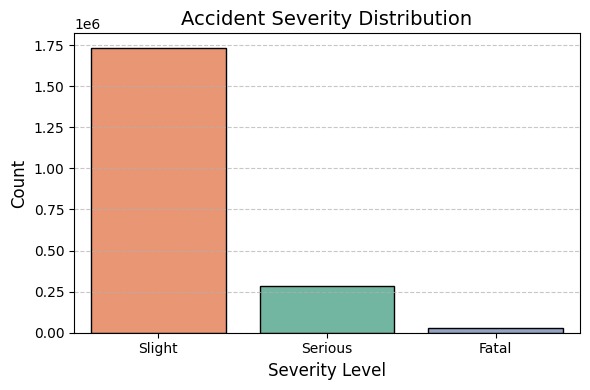

In [29]:
# Ensure 'Accident_Severity' column exists and has the correct categories
order = ['Slight', 'Serious', 'Fatal']

plt.figure(figsize=(6, 4))
sns.countplot(
    data=as_accident_level,
    x='Accident_Severity',
    hue='Accident_Severity',          # Add this to avoid the future warning
    order=order,
    palette='Set2',                   # Choose a visually appealing palette
    edgecolor='black',
    legend=False                      # Remove redundant legend
)

plt.title('Accident Severity Distribution', fontsize=14)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## EDA PLOTS

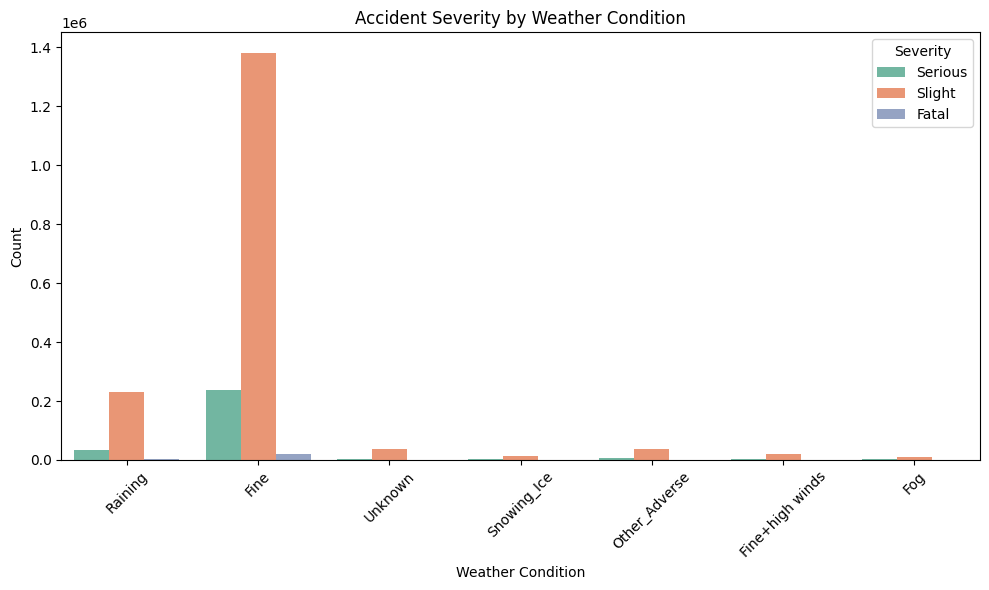

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=as_accident_level, x='Weather_Label', hue='Accident_Severity', palette='Set2')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


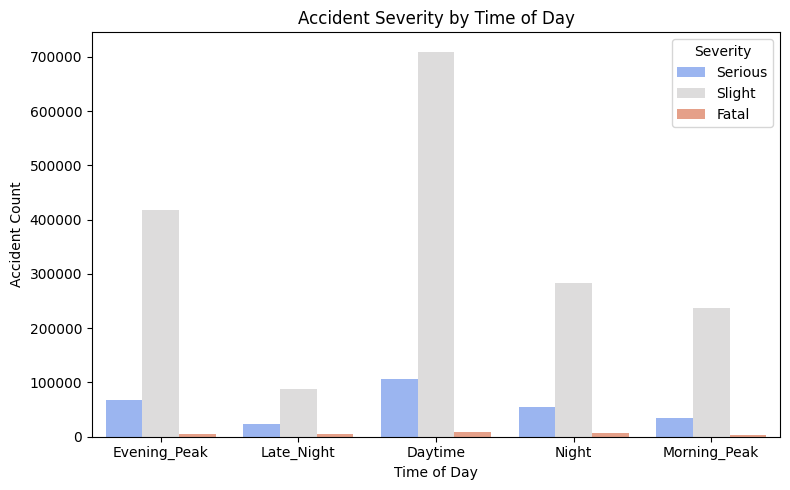

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=as_accident_level, x='Time_of_Day', hue='Accident_Severity', palette='coolwarm')
plt.title('Accident Severity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Accident Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


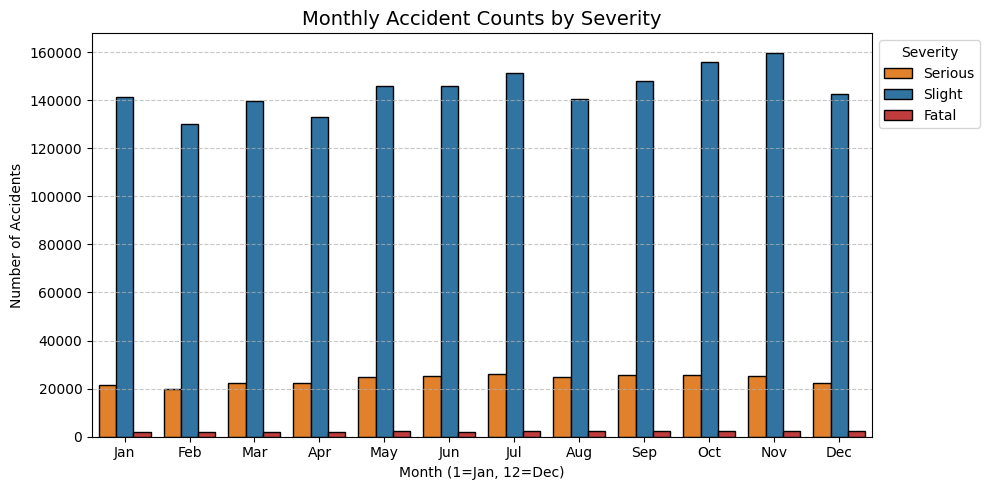

In [32]:

plt.figure(figsize=(10, 5))

# Use a well-contrasted palette manually
custom_palette = {'Slight': '#1f77b4', 'Serious': '#ff7f0e', 'Fatal': '#d62728'}

sns.countplot(
    data=as_accident_level,
    x='Month',
    hue='Accident_Severity',
    palette=custom_palette,
    edgecolor='black'
)

plt.title('Monthly Accident Counts by Severity', fontsize=14)
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move legend outside the plot area to the top right
plt.legend(title='Severity', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()



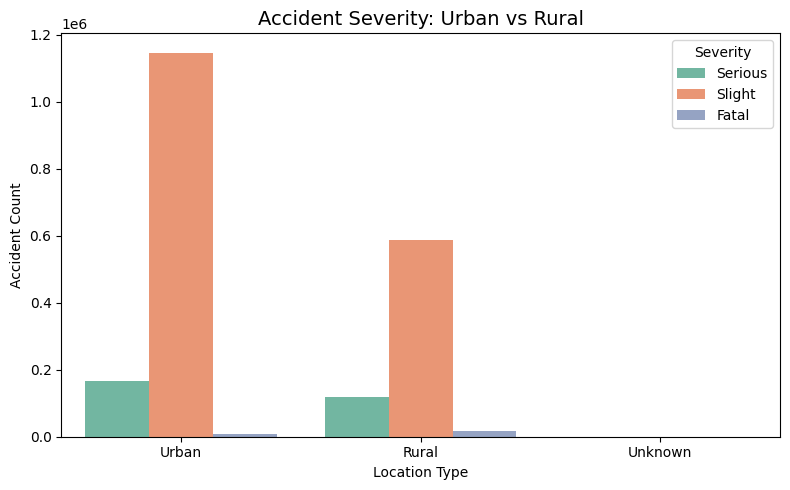

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=as_accident_level,
    x='Urban_Rural_Label',
    hue='Accident_Severity',
    palette='Set2'
)
plt.title('Accident Severity: Urban vs Rural', fontsize=14)
plt.xlabel('Location Type')
plt.ylabel('Accident Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


In [34]:
# Group by district and accident severity, count occurrences
severity_counts = as_accident_level.groupby(
    ['Local_Authority_(District)', 'Accident_Severity']
).size().unstack(fill_value=0)

# Reorder columns just in case
severity_counts = severity_counts[['Slight', 'Serious', 'Fatal']]

# Total all severities
severity_counts['Total_Accidents'] = severity_counts.sum(axis=1)

# Ensure it's a DataFrame
severity_counts = severity_counts.reset_index()

# Sort descending by total
severity_sorted = severity_counts.sort_values(by='Total_Accidents', ascending=False)

# Show top 10 districts
print(severity_sorted.head(10))




Accident_Severity Local_Authority_(District)  Slight  Serious  Fatal  \
24                                Birmingham   34400     4924    338   
192                                    Leeds   23372     3696    260   
398                              Westminster   17059     2597    118   
144                             Glasgow City   15836     2552    167   
35                                  Bradford   15530     2430    187   
205                               Manchester   15814     2131    168   
299                                Sheffield   14757     2415    139   
198                                Liverpool   14544     2599    138   
126                       Edinburgh, City of   13655     2008    105   
190                                  Lambeth   13013     1844     86   

Accident_Severity  Total_Accidents  
24                           39662  
192                          27328  
398                          19774  
144                          18555  
35                    

In [35]:
# Step 1: Get top 10 local authorities by accident count
top_areas = (
    as_accident_level.groupby('Local_Authority_(District)')
    .size()
    .reset_index(name='Accident_Count')
    .sort_values(by='Accident_Count', ascending=False)
    .head(10)
)

# Step 2: Get average Lat/Lon per district
location_data = (
    as_accident_level.groupby('Local_Authority_(District)')[['Latitude', 'Longitude']]
    .mean()
    .reset_index()
)

# Step 3: Merge data
top_10_map_data = pd.merge(top_areas, location_data, on='Local_Authority_(District)', how='left')

# Step 4: Create UK-constrained Folium map
m = folium.Map(
    location=[54.5, -3],      # Center of UK
    zoom_start=6,
    tiles='CartoDB positron',
    max_bounds=True,
    min_zoom=5
)

# Constrain map to approximate UK bounding box
m.fit_bounds([[49.8, -8.6], [60.9, 1.8]])

# Step 5: Add top 10 accident markers
for _, row in top_10_map_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(
            f"<b>{row['Local_Authority_(District)']}</b><br>Accidents: {row['Accident_Count']}",
            max_width=250),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Step 6: Display map in notebook
m


In [36]:
# Simply get a Python list of column names
final_columns = list(as_accident_level.columns)
print(final_columns)


['Accident_Severity', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'InScotland', 'Date_dt', 'Hour', 'Weekday_Num', 'Month', 'Day_of_Week_Label', 'Year', 'Season', 'Time_of_Day', 'Urban_Rural_Label', 'Weather_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Light_Label', 'Speed_Bin']


# DATA MODELING

## ENCODING THE FEATURES


*   Not every columns data will be ordinal,in such cases label encoder cant be applied on every column ,hence in this dataset,the ordinal columns are applied with label encoding and rest categorical is included with onehot
* The numerical columns are just used standard normalisation



In [37]:
# Numerical columns (int or float)
num_cols = as_accident_level.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns (object or category)
cat_cols = as_accident_level.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)



Numeric features: ['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Hour']
Categorical features: ['Accident_Severity', 'Local_Authority_(District)', 'LSOA_of_Accident_Location', 'Police_Force', 'InScotland', 'Day_of_Week_Label', 'Season', 'Time_of_Day', 'Urban_Rural_Label', 'Weather_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Light_Label', 'Speed_Bin']


In [38]:
as_accident_level['Severe&Fatal'] = as_accident_level['Accident_Severity'].isin(['Serious', 'Fatal']).astype(int)

# Step 2: Encode categorical features
from sklearn.preprocessing import LabelEncoder

# Label encode simpler categorical features
label_encode_cols = ['Season', 'Time_of_Day', 'Urban_Rural_Label', 'Speed_Bin']
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    as_accident_level[col] = le.fit_transform(as_accident_level[col])
    label_encoders[col] = le

# One-hot encode multi-class features with no ordinal relationship
onehot_encode_cols = ['Weather_Label', 'Light_Label', 'Road_Surface_Label', 'Road_Type_Label', 'Day_of_Week_Label']
as_accident_encoded = pd.get_dummies(as_accident_level, columns=onehot_encode_cols, drop_first=True)

# Step 3: Select features for modeling
features = [
    'Number_of_Casualties', 'Number_of_Vehicles', 'Hour', 'Weekday_Num', 'Month'
] + label_encode_cols + [col for col in as_accident_encoded.columns if any(prefix in col for prefix in onehot_encode_cols)]
target = 'Severe&Fatal'

X = as_accident_encoded[features]
y = as_accident_encoded[target]

/tmp/ipython-input-39-1573864618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=as_accident_level, x='Severe&Fatal', palette='Set2')


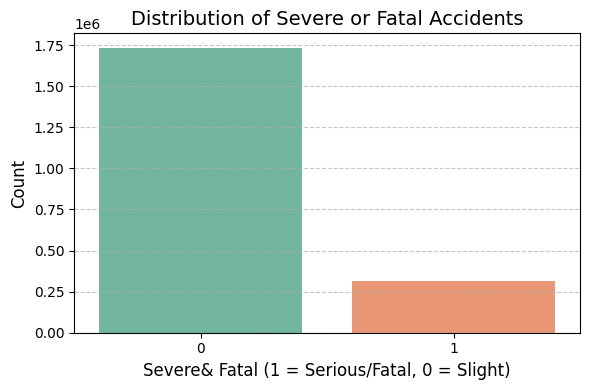

In [39]:

plt.figure(figsize=(6, 4))
sns.countplot(data=as_accident_level, x='Severe&Fatal', palette='Set2')
plt.title('Distribution of Severe or Fatal Accidents', fontsize=14)
plt.xlabel('Severe& Fatal (1 = Serious/Fatal, 0 = Slight)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# DOWN SAMPLING TO BALANCE DATA

In [40]:
from sklearn.utils import resample

# Define features and target
X = as_accident_encoded[features]
y = as_accident_encoded['Severe&Fatal']  # ✅ updated column name

# Combine into one DataFrame
full_data = pd.concat([X, y], axis=1)

# Split into majority and minority classes
majority = full_data[full_data['Severe&Fatal'] == 0]
minority = full_data[full_data['Severe&Fatal'] == 1]

# Downsample majority class
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority) * 2,  # or use =len(minority) for full balance
    random_state=42
)

# Combine downsampled majority with all minority
balanced_df = pd.concat([majority_downsampled, minority])


/tmp/ipython-input-41-29734504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=as_accident_level, x='Severe&Fatal', palette='Set2')


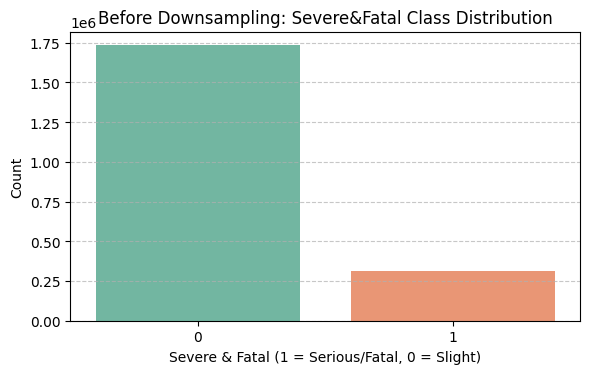

Class counts before downsampling:
Severe&Fatal
0    1734402
1     312679
Name: count, dtype: int64
Severe/Fatal proportion: 15.274%


/tmp/ipython-input-41-29734504.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_df, x='Severe&Fatal', palette='Set1')


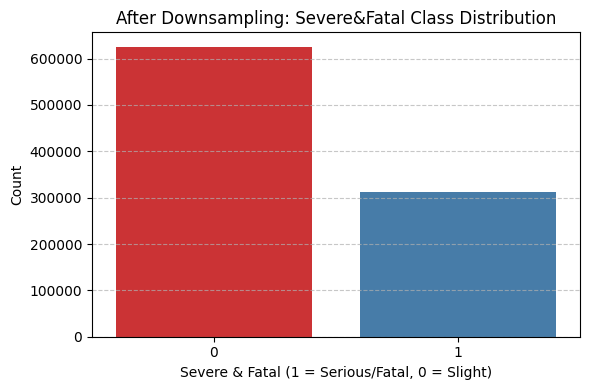


Class counts after downsampling:
Severe&Fatal
0    625358
1    312679
Name: count, dtype: int64
New Severe/Fatal proportion: 33.333%


In [41]:
# BEFORE DOWNSAMPLING VISUALIZATION
plt.figure(figsize=(6, 4))
sns.countplot(data=as_accident_level, x='Severe&Fatal', palette='Set2')
plt.title('Before Downsampling: Severe&Fatal Class Distribution')
plt.xlabel('Severe & Fatal (1 = Serious/Fatal, 0 = Slight)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Class counts before downsampling:")
print(as_accident_level['Severe&Fatal'].value_counts())
print(f"Severe/Fatal proportion: {as_accident_level['Severe&Fatal'].mean():.3%}")

# AFTER DOWNSAMPLING VISUALIZATION
balanced_df = pd.concat([majority_downsampled, minority])
plt.figure(figsize=(6, 4))
sns.countplot(data=balanced_df, x='Severe&Fatal', palette='Set1')
plt.title('After Downsampling: Severe&Fatal Class Distribution')
plt.xlabel('Severe & Fatal (1 = Serious/Fatal, 0 = Slight)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nClass counts after downsampling:")
print(balanced_df['Severe&Fatal'].value_counts())
print(f"New Severe/Fatal proportion: {balanced_df['Severe&Fatal'].mean():.3%}")


# MODEL 1-LOGISTIC REGRESSION


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.68      0.96      0.80    125072
           1       0.57      0.10      0.17     62536

    accuracy                           0.67    187608
   macro avg       0.62      0.53      0.48    187608
weighted avg       0.64      0.67      0.59    187608

Confusion Matrix:
 [[120303   4769]
 [ 56280   6256]]
ROC AUC Score: 0.6270837297959436


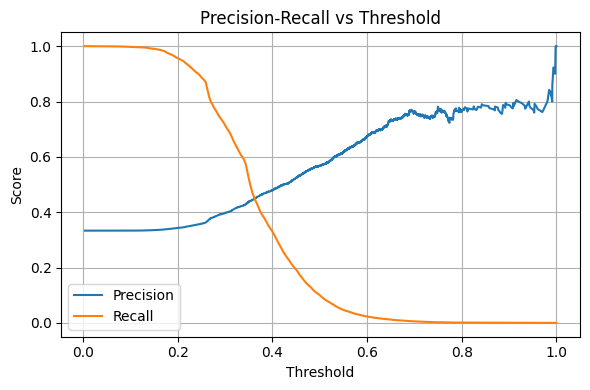

In [42]:
# === Logistic Regression on Already Downsampled Data ===

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# 1. Features and Target
X = balanced_df.drop(columns=['Severe&Fatal'])
y = balanced_df['Severe&Fatal']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Train Logistic Regression
log_clf = LogisticRegression(max_iter=1000, solver='liblinear')
log_clf.fit(X_train, y_train)

# 4. Predictions
y_pred = log_clf.predict(X_test)
y_proba = log_clf.predict_proba(X_test)[:, 1]

# 5. Evaluation
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 6. Precision-Recall Curve + Custom Threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
# === Sample Input Prediction (Severe&Fatal: 0 = Slight, 1 = Severe/Fatal) ===

sample_input = {
    'Number_of_Casualties': 1,
    'Number_of_Vehicles': 2,
    'Hour': 15,
    'Weekday_Num': 2,  # Wednesday
    'Month': 6,
    'Season': 'Summer',
    'Time_of_Day': 'Daytime',
    'Urban_Rural_Label': 'Urban',
    'Speed_Bin': 'Low_30',
    'Weather_Label': 'Fine',
    'Light_Label': 'Daylight',
    'Road_Surface_Label': 'Dry',
    'Road_Type_Label': 'Roundabout',
    'Day_of_Week_Label': 'Wednesday'
}



# Convert to DataFrame
sample_df = pd.DataFrame([sample_input])

# Apply label encoding
for col in label_encode_cols:
    sample_df[col] = label_encoders[col].transform(sample_df[col])

# One-hot encode nominal features
sample_df = pd.get_dummies(sample_df, columns=onehot_encode_cols)

# Align with training features
for col in X.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0
sample_df = sample_df[X.columns]  # Ensure column order

# Predict using default threshold (0.5)
pred_class = log_clf.predict(sample_df)[0]
proba = log_clf.predict_proba(sample_df)[0][1]

# Interpret output
label = "Severe/Fatal" if pred_class == 1 else "Slight"

print("\n=== Prediction Result ===")
print(f"Predicted Class: {pred_class} → {label}")
print(f"Probability of Severe/Fatal: {round(proba, 3)}")



=== Prediction Result ===
Predicted Class: 0 → Slight
Probability of Severe/Fatal: 0.17


In [44]:
# === Sample Input 2: Prediction (Severe&Fatal: 0 = Slight, 1 = Severe/Fatal) ===

sample_input_2 = {
    'Number_of_Casualties': 3,
    'Number_of_Vehicles': 1,
    'Hour': 2,
    'Weekday_Num': 6,
    'Month': 1,
    'Season': 'Winter',
    'Time_of_Day': 'Late_Night',
    'Urban_Rural_Label': 'Rural',
    'Speed_Bin': 'High_70',
    'Weather_Label': 'Raining',
    'Light_Label': 'Dark_No_Lighting',
    'Road_Surface_Label': 'Wet_or_Damp',
    'Road_Type_Label': 'Single_Carriageway',
    'Day_of_Week_Label': 'Sunday'
}

# Convert to DataFrame
sample_df2 = pd.DataFrame([sample_input_2])

# Apply label encoding
for col in label_encode_cols:
    sample_df2[col] = label_encoders[col].transform(sample_df2[col])

# One-hot encode nominal features
sample_df2 = pd.get_dummies(sample_df2, columns=onehot_encode_cols)

# Align with training features
for col in X.columns:
    if col not in sample_df2.columns:
        sample_df2[col] = 0
sample_df2 = sample_df2[X.columns]  # Ensure column order

# Predict using default threshold (0.5)
pred_class_2 = log_clf.predict(sample_df2)[0]
proba_2 = log_clf.predict_proba(sample_df2)[0][1]

# Interpret output
label_2 = "Severe/Fatal" if pred_class_2 == 1 else "Slight"

print("\n=== Prediction Result: Sample Input 2 ===")
print(f"Predicted Class: {pred_class_2} → {label_2}")
print(f"Probability of Severe/Fatal: {round(proba_2, 3)}")



=== Prediction Result: Sample Input 2 ===
Predicted Class: 1 → Severe/Fatal
Probability of Severe/Fatal: 0.637


Training with LR=0.01, Iterations=500
Training with LR=0.01, Iterations=1000
Training with LR=0.01, Iterations=1500
Training with LR=0.05, Iterations=500
Training with LR=0.05, Iterations=1000
Training with LR=0.05, Iterations=1500
Training with LR=0.1, Iterations=500
Training with LR=0.1, Iterations=1000
Training with LR=0.1, Iterations=1500

🔍 Grid Search Results (Sorted by F1-score):
   learning_rate  iterations  accuracy  f1_score    recall  precision  \
7           0.10        1000  0.674619  0.170147  0.100070   0.567671   
8           0.10        1500  0.674577  0.170128  0.100070   0.567259   
5           0.05        1500  0.674635  0.170041  0.099990   0.567887   
6           0.10         500  0.674785  0.169857  0.099815   0.569474   
4           0.05        1000  0.674785  0.169857  0.099815   0.569474   
3           0.05         500  0.674875  0.165307  0.096584   0.573055   
0           0.01         500  0.674534  0.162713  0.094873   0.571030   
2           0.01        15

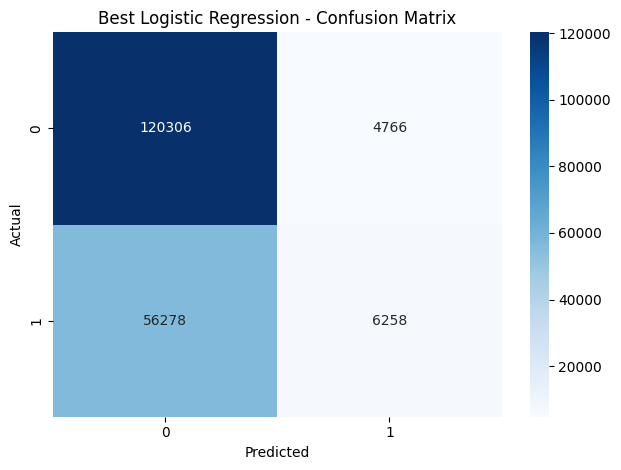

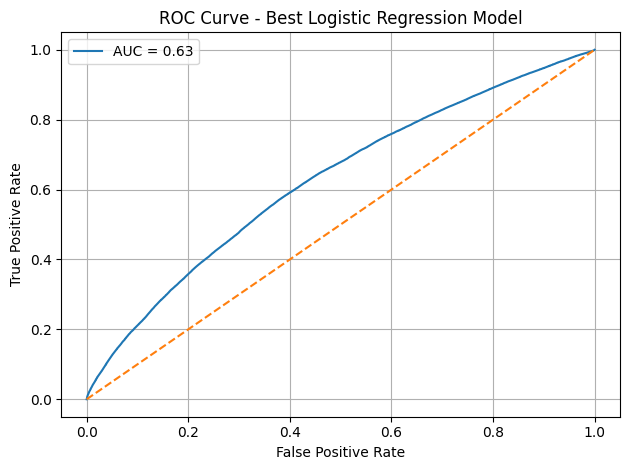

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)

# === 1. Prepare data ===
X = balanced_df.drop(columns=['Severe&Fatal']).values
y = balanced_df['Severe&Fatal'].astype(int).values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === 2. Define helper functions ===
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(y, h):
    epsilon = 1e-5
    return -np.mean(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

def train_logistic_regression(X, y, learning_rate=0.1, iterations=1000):
    m, n = X.shape
    weights = np.zeros((n, 1))
    losses = []

    for i in range(iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
        if i % 50 == 0:
            losses.append(compute_cost(y, h))
    return weights, losses

def evaluate_model(X_test, y_test, weights):
    y_proba = sigmoid(np.dot(X_test, weights))
    y_pred = (y_proba >= 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['1']['f1-score']
    recall = report['1']['recall']
    precision = report['1']['precision']
    return acc, auc_score, f1, recall, precision, y_pred, y_proba

# === 3. Grid Search for Hyperparameters ===
results = []
learning_rates = [0.01, 0.05, 0.1]
iterations_list = [500, 1000, 1500]

for lr in learning_rates:
    for iters in iterations_list:
        print(f"Training with LR={lr}, Iterations={iters}")
        weights, losses = train_logistic_regression(X_train, y_train, learning_rate=lr, iterations=iters)
        acc, auc_score, f1, recall, precision, _, _ = evaluate_model(X_test, y_test, weights)

        results.append({
            'learning_rate': lr,
            'iterations': iters,
            'accuracy': acc,
            'f1_score': f1,
            'recall': recall,
            'precision': precision,
            'auc': auc_score
        })

#  4. Display Results Sorted by F1-score
results_df = pd.DataFrame(results)
print("\n🔍 Grid Search Results (Sorted by F1-score):")
print(results_df.sort_values(by='f1_score', ascending=False))

# === 5. Train Best Model Based on F1-score ===
best = results_df.sort_values(by='f1_score', ascending=False).iloc[0]
best_lr = best['learning_rate']
best_iters = int(best['iterations'])

weights, _ = train_logistic_regression(X_train, y_train, learning_rate=best_lr, iterations=best_iters)
_, auc_score, f1, recall, precision, y_pred_final, y_proba_final = evaluate_model(X_test, y_test, weights)

# === 6. Final Evaluation ===
print("\n Best Model Evaluation (Optimized for F1-score):")
print(f"Learning Rate: {best_lr}, Iterations: {best_iters}")
print(f"F1-score:  {f1:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"ROC AUC:   {auc_score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

# === 7. Visualization ===
# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues')
plt.title("Best Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_final)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Best Logistic Regression Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
